# CSE 572: Homework 2

This notebook provides a template and starting code to implement the Homework 2 assignment.

To execute and make changes to this notebook, click File > Save a copy to save your own version in your Google Drive or Github. Read the step-by-step instructions below carefully. To execute the code, click on each cell below and press the SHIFT-ENTER keys simultaneously or by clicking the Play button. 

When you finish executing all code/exercises, save your notebook then download a copy (.ipynb file). Submit the following **three** things:
1. a link to your Colab notebook,
2. the .ipynb file, and
3. a pdf of the executed notebook on Canvas.

To generate a pdf of the notebook, click File > Print > Save as PDF.

Name - Swarali Chine

ASU ID - 1222583687

## Prepare the dataset

In this homework, you will compare the effect of multiple dimensionality reduction techniques on the classification performance for the [Covertype dataset](https://archive.ics.uci.edu/ml/datasets/Covertype).  The classification task for this dataset is to predict the forest cover type of a 30 m x 30 m patch of forested land described by 54 attributes. The attributes include features such as elevation, aspect, slope, soil characteristics, etc. The dataset was created by the Department of Forest Sciences at Colorado State University and the US Forest Service in 1998. 

In [1]:
import pandas as pd
from sklearn.datasets import fetch_covtype

dataset = fetch_covtype(as_frame=True)

data = dataset.data
labels = dataset.target

In [2]:
data.sample(10)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
504456     3373.0    15.0    5.0                             153.0   
379565     3280.0   120.0   16.0                             488.0   
523921     3171.0   264.0    6.0                             514.0   
210047     3230.0   177.0    5.0                             182.0   
136097     3109.0   104.0   12.0                              95.0   
26940      2804.0    58.0    9.0                             242.0   
244499     2220.0   330.0   19.0                             351.0   
127786     3119.0    71.0   10.0                             339.0   
331987     3256.0   239.0    7.0                             470.0   
334343     3200.0   109.0   13.0                              60.0   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
504456                            28.0                            595.0   
379565                            57.0                           3059.0   
523921                            62.0                            306.0   
210047                            27.0                           4872.0   
136097                            23.0                           3055.0   
26940                             19.0                           3140.0   
244499                           144.0                            531.0   
127786                            36.0                           3584.0   
331987                            70.0                           1307.0   
334343                             1.0                           1719.0   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
504456          216.0           230.0          152.0   
379565          246.0           224.0          102.0   
523921          204.0           243.0          178.0   
210047          222.0           242.0          155.0   
136097          241.0           224.0          111.0   
26940           227.0           221.0          127.0   
244499          172.0           214.0          180.0   
127786          231.0           221.0          121.0   
331987          207.0           246.0          176.0   
334343          242.0           225.0          110.0   

        Horizontal_Distance_To_Fire_Points  ...  Soil_Type_30  Soil_Type_31  \
504456                               872.0  ...           0.0           0.0   
379565                              3191.0  ...           0.0           1.0   
523921                              2940.0  ...           1.0           0.0   
210047                               511.0  ...           0.0           0.0   
136097                              3208.0  ...           0.0           0.0   
26940                               6597.0  ...           0.0           0.0   
244499                               212.0  ...           0.0           0.0   
127786                              2721.0  ...           0.0           0.0   
331987                              2176.0  ...           0.0           0.0   
334343                               661.0  ...           1.0           0.0   

        Soil_Type_32  Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  \
504456           0.0           0.0           0.0           0.0           0.0   
379565           0.0           0.0           0.0           0.0           0.0   
523921           0.0           0.0           0.0           0.0           0.0   
210047           0.0           0.0           0.0           0.0           0.0   
136097           0.0           0.0           0.0           0.0           0.0   
26940            0.0           0.0           0.0           0.0           0.0   
244499           0.0           0.0           0.0           0.0           0.0   
127786           0.0           0.0           0.0           0.0           0.0   
331987           0.0           0.0           0.0           0.0           0.0   
334343           0.0           0.0           0.0           0.0           0.0   

        Soil_Type_37  Soil_Type_38  Soil_Ty

In [3]:
label_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

In [4]:
labels.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

## Dimensionality reduction

You will implement 2 dimensionality reduction techniques:
- PCA (linear)
- Autoencoder neural network (non-linear)

For PCA, you will create a plot of the total fraction of explained variance by the first 1 through 10 principal components (as we did in Lab 11). Choose the number of principal components to retain based on the inflection point of this plot, i.e., the point at which the increase in total explained variance begins to plateau (as we did in Lab 11).

For the autoencoder neural network, implement a network with the following layers:
1. Input layer (# units = 54) [encoder]
2. Hidden layer (# units = 32) [encoder]
3. Hidden layer (# units = number of PCs retained for PCA) [encoded/bottleneck layer]
4. Hidden layer (# units = 32) [decoder]
5. Output layer (# units = 54) [decoder]

For example, if you chose to use 3 principal components in PCA, you will have a bottleneck layer of 3 units in your autoencoder. 

Use ‘relu’ activation for hidden layers and ‘sigmoid’ activation for the output layer, ‘sgd’ (stochastic gradient descent) for the optimizer, and ‘mse’ (mean squared error) as the loss function. Train your model for 100 epochs with a batch size of 64. Lab 12 will be a useful guide for this implementation. Note that you will use the predict() function with only the encoder part of the model to transform your features into the encoded (reduced-dimension) representation.

In [6]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
random_seed = 0

#We will standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

#We will now split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.3, random_state=random_seed
)

#We will now build the PCA Model
from sklearn.decomposition import PCA

n_components = 10

pca = PCA(n_components=n_components).fit(X_train)

for i in range(n_components):
    print('The percentage of variance explained by PC {}: {}'.format(i+1, pca.explained_variance_ratio_[i]))
    
print('The total variance explained by 10 PCs: {}'.format(np.sum(pca.explained_variance_ratio_)))

The percentage of variance explained by PC 1: 0.06848788147921422
The percentage of variance explained by PC 2: 0.05414421705752541
The percentage of variance explained by PC 3: 0.0443930893645978
The percentage of variance explained by PC 4: 0.037033021073586546
The percentage of variance explained by PC 5: 0.028081677325181024
The percentage of variance explained by PC 6: 0.026629539674247246
The percentage of variance explained by PC 7: 0.022191585108205562
The percentage of variance explained by PC 8: 0.02047047522406661
The percentage of variance explained by PC 9: 0.019966524972596576
The percentage of variance explained by PC 10: 0.019586168116486963
The total variance explained by 10 PCs: 0.34098417939570796


Text(0, 0.5, 'The Fraction of Total Variance Explained')

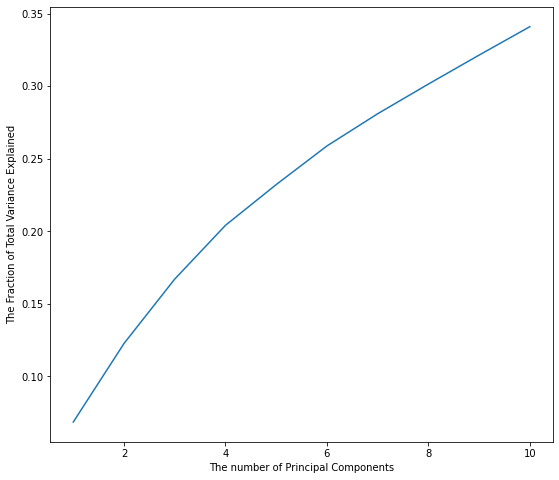

In [8]:
total_variance = [pca.explained_variance_ratio_[0]]
for i in range(1, n_components):
  total_variance.append(pca.explained_variance_ratio_[i] + total_variance[i-1])

fig, ax = plt.subplots(ncols=1, figsize=(9,8))
ax.plot(range(1, n_components + 1), total_variance)
ax.set_xlabel('The number of Principal Components')
ax.set_ylabel('The Fraction of Total Variance Explained')

In [9]:
#The 6 principal components to be choosed based on the plot
pca = PCA(n_components=6).fit(X_train)
print('The total variance explained by 10 PCs: {}'.format(np.sum(pca.explained_variance_ratio_)))
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

The total variance explained by 10 PCs: 0.2580943280444709


In [10]:
#The autoencoder Neural Network
import keras
from keras import layers

#The size of our encoded representations
encoding_dim = 32  

# The size of input image
input_data = keras.Input(shape=(X_train.shape[1],))

# "encoded" is the encoded representation of the input
encoded = layers.Dense(32, activation='relu')(input_data)
encoded = layers.Dense(6, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(X_train.shape[1], activation='sigmoid')(decoded)

# The model now maps an input to its reconstruction
autoencoder = keras.Model(input_data, decoded)

# The model now maps an input to its encoded representation
encoder = keras.Model(input_data, encoded)

autoencoder.compile(optimizer='sgd', loss='mse')

autoencoder.fit(x=X_train, y=X_train,
                epochs=100,
                batch_size=64,
                shuffle=True)

Epoch 1/100
6355/6355 [==============================] - 12s 2ms/step - loss: 1.0972
Epoch 2/100
6355/6355 [==============================] - 12s 2ms/step - loss: 0.9806
Epoch 3/100
6355/6355 [==============================] - 12s 2ms/step - loss: 0.9639
Epoch 4/100
6355/6355 [==============================] - 17s 3ms/step - loss: 0.9503
Epoch 5/100
6355/6355 [==============================] - 13s 2ms/step - loss: 0.9399
Epoch 6/100
6355/6355 [==============================] - 12s 2ms/step - loss: 0.9333
Epoch 7/100
6355/6355 [==============================] - 13s 2ms/step - loss: 0.9244
Epoch 8/100
6355/6355 [==============================] - 12s 2ms/step - loss: 0.9117
Epoch 9/100
6355/6355 [==============================] - 12s 2ms/step - loss: 0.9010
Epoch 10/100
6355/6355 [==============================] - 12s 2ms/step - loss: 0.8929
Epoch 11/100
6355/6355 [==============================] - 13s 2ms/step - loss: 0.8859
Epoch 12/100
6355/6355 [==============================] - 12s 2

In [11]:
X_train_encode = encoder.predict(X_train)
X_test_encode = encoder.predict(X_test)

5447/5447 [==============================] - 8s 1ms/step


## Classification

You will use a Random Forest classifier with 100 trees for the classification model (using Scikit-learn). Leave all other hyperparameters as their default values. You will train 3 separate random forest classifiers with 1) input data transformed using PCA, 2) input data transformed using autoencoder, 3) no dimensionality reduction (original data attributes).

In [12]:
# YOUR CODE HERE
from sklearn import ensemble

n_trees = 100

clf_PCA = ensemble.RandomForestClassifier(n_estimators=n_trees)
clf_PCA.fit(X_train_pca, y_train)

clf_autoencoder = ensemble.RandomForestClassifier(n_estimators=n_trees)
clf_autoencoder.fit(X_train_encode, y_train)

clf = ensemble.RandomForestClassifier(n_estimators=n_trees)
clf.fit(X_train, y_train)



RandomForestClassifier()

In [13]:
y_pred_PCA = clf_PCA.predict(X_test_pca)
y_pred_autoencoder = clf_autoencoder.predict(X_test_encode)
y_pred = clf.predict(X_test)

## Evaluation

Your final model evaluation should be performed on the test set. You will compare the results of the two dimensionality reduction + Random Forest methods (PCA + RF, Autoencoder + RF) as well as a baseline Random Forest classifier that does not use any dimensionality reduction (the original attributes will be the input feature vector). For each of the 3 methods, print the classification report (including class-wise precision, recall, F1 + overall accuracy) and plot the confusion matrix. 

In [15]:
# YOUR CODE HERE
#PCA + RF Classification Report
from sklearn.metrics import classification_report
print("The PCA + RF Classification Report is:")
print(classification_report(y_test, y_pred_PCA, target_names=label_names))

The PCA + RF Classification Report is:
                   precision    recall  f1-score   support

       Spruce/Fir       0.89      0.87      0.88     63498
   Lodgepole Pine       0.89      0.92      0.90     85198
   Ponderosa Pine       0.83      0.90      0.87     10581
Cottonwood/Willow       0.84      0.69      0.76       822
            Aspen       0.85      0.56      0.68      2850
      Douglas-fir       0.78      0.67      0.72      5229
        Krummholz       0.93      0.85      0.89      6126

         accuracy                           0.88    174304
        macro avg       0.86      0.78      0.81    174304
     weighted avg       0.88      0.88      0.88    174304



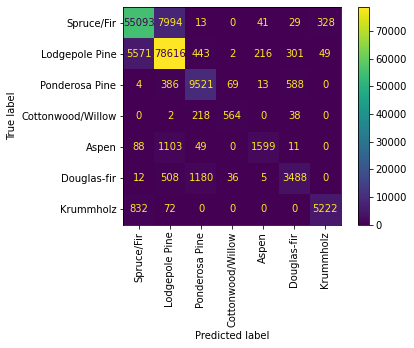

<Figure size 864x864 with 0 Axes>

In [17]:
#The code for PCA + RF Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    clf_PCA, X_test_pca, y_test, display_labels=label_names, xticks_rotation="vertical")
plt.figure(figsize=(12, 12))
plt.tight_layout()
plt.show()

In [19]:
#The code for Auto-encoder + RF Classification Report
print("The Auto-encoder and RF Classification Report is:")
print(classification_report(y_test, y_pred_autoencoder, target_names=label_names))

The Auto-encoder and RF Classification Report is:
                   precision    recall  f1-score   support

       Spruce/Fir       0.90      0.88      0.89     63498
   Lodgepole Pine       0.89      0.92      0.91     85198
   Ponderosa Pine       0.82      0.87      0.85     10581
Cottonwood/Willow       0.83      0.67      0.74       822
            Aspen       0.83      0.56      0.67      2850
      Douglas-fir       0.74      0.64      0.69      5229
        Krummholz       0.92      0.87      0.89      6126

         accuracy                           0.89    174304
        macro avg       0.85      0.77      0.81    174304
     weighted avg       0.89      0.89      0.88    174304



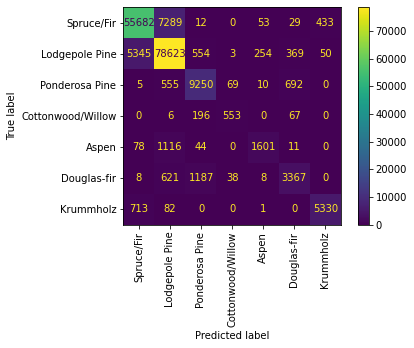

<Figure size 864x864 with 0 Axes>

In [20]:
#The code for Auto-encoder + RF Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    clf_autoencoder, X_test_encode, y_test, display_labels=label_names, xticks_rotation="vertical")
plt.figure(figsize=(12, 12))
plt.tight_layout()
plt.show()

In [21]:
#The code for RF Classification Report is
print("The RF Classiication Report is:")
print(classification_report(y_test, y_pred, target_names=label_names))

The RF Classiication Report is:
                   precision    recall  f1-score   support

       Spruce/Fir       0.96      0.94      0.95     63498
   Lodgepole Pine       0.95      0.97      0.96     85198
   Ponderosa Pine       0.94      0.96      0.95     10581
Cottonwood/Willow       0.91      0.84      0.87       822
            Aspen       0.95      0.77      0.85      2850
      Douglas-fir       0.93      0.90      0.91      5229
        Krummholz       0.97      0.95      0.96      6126

         accuracy                           0.95    174304
        macro avg       0.94      0.90      0.92    174304
     weighted avg       0.95      0.95      0.95    174304



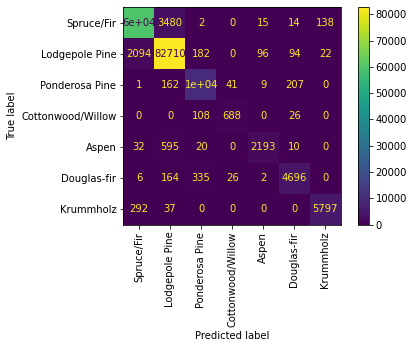

<Figure size 864x864 with 0 Axes>

In [22]:
#The code for RF Confusion Matrix is
ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, display_labels=label_names, xticks_rotation="vertical")
plt.figure(figsize=(12, 12))
plt.tight_layout()
plt.show()

# **Discussion**

The Accuracy is: Random Forests > PCA > Auto-encoder

From the above found results,the normal Random Forests classifier provides the best accuracy than applying PCA or Auto-encoding it.
The PCA model might lose some spatial information which is useful for classification and it does not consider the target variable into account. This could be the reason for the normal Random Forests classifier provide the best accuracy than applying PCA or Auto-encoding it.
The auto-encoder network might require a different architecture to auto-encode the images properly so that it resembles the original image properly. It might require the number of layers and the number of neurons, the number of epochs.